# **Libraries**

In [1]:
###################################################################################################
#  Bibliotecas gerais
#  Instalação

!pip install xlrd

In [2]:
###################################################################################################
#  Bibliotecas gerais
#  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from numpy.linalg import matrix_rank

In [3]:
###################################################################################################
#  Bibliotecas gráfica
#  Instalação

!pip install -U plotly
# !pip install plotly==4.8.1

# organização da planilha excel

!pip install nltk

# Exportando figuras com melhores resoluções

!pip install -U kaleido

!add-apt-repository -y ppa:cran/poppler
!apt-get update
!apt-get install -y libpoppler-cpp-dev
!apt-get install poppler-utils

     |████████████████████████████████| 20.6MB 1.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9MB 51kB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1

In [4]:
###################################################################################################
#  Bibliotecas gráfica
# 
# 

import plotly.express as px
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Diretório de imagens
import os
if not os.path.exists("images"):
    os.mkdir("images")


## **Controle**

In [5]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# Instalação

!git clone https://github.com/python-control/python-control.git

!pip install slycot   # optional
!pip install control



Cloning into 'python-control'...
remote: Enumerating objects: 7706, done.
remote: Counting objects: 100% (585/585), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 7706 (delta 409), reused 499 (delta 367), pack-reused 7121
Receiving objects: 100% (7706/7706), 8.52 MiB | 27.79 MiB/s, done.
Resolving deltas: 100% (5718/5718), done.
     |████████████████████████████████| 1.6MB 26.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417860 sha256=356bda64782d4c2f1f1baf614a2a649cf50263555e74a7e164ed42adeaa17ee8
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 348kB 32.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=74c4ec954b7be60aae8

In [6]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# 

import control
from control import impulse_response, step_response


# **Utilitary Functions**

In [7]:
def graphics_plot(x, y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  for i, v in enumerate(y):
    
    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if i == 0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2)),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2,dash=dash[i-1])),
          # line_shape='spline'),
          secondary_y=on)
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Relative Year')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

# **Data**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
###################################################################################################
#  Real data for the model analysis

LV_Data = '/content/drive/MyDrive/ISMIN/Semestre 8/Stage International/Instituto Maua de Tecnologia/Maua Internship/05_Notebooks/Lotka_Volterra/Fur_Pelts_1900_to_1920.xlsx'
LV_df = pd.read_excel(LV_Data,sheet_name='Raw Data')
LV_df.head()

,Year,Hare,Lynx
0,1900,30000,4000
1,1901,47200,6100
2,1902,70200,9800
3,1903,77400,35200
4,1904,36300,59400


In [10]:
###################################################################################################
#  Real data for the model analysis

hare = np.array(LV_df['Hare']/1000)
lynx = np.array(LV_df['Lynx']/1000)
year  = np.array(LV_df['Year'] - 1900)

In [11]:
graphics_plot(year, [hare,lynx], ['Prey','Predador'], ['Prey','Predador'] , title='Lotka_Volterra', bins=1, x_tick=1, save=False)

In [12]:
np.corrcoef(hare,lynx)

array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

# **Dynamic Model**

**Prey - Hare**

\begin{equation}
\frac{dH(t)}{dt} = \alpha H(t) - \beta H(t) L(t) + u_1(t)
\end{equation}

**Predador - Linx**

\begin{equation}
\frac{dL(t)}{dt} = -\gamma L(t) + \delta H(t) L(t) + u_2(t)
\end{equation}

In [13]:
###################################################################################################
#  Non Linear Model

def preypredador(t,x,u,parameters):
  """ Creation of the non linear model phenomenon """

  # Initial Parameters
  a = parameters.get('a', 0.48069)
  b = parameters.get('b', 0.024822)
  c = parameters.get('c', 0.92718)
  d = parameters.get('d', 0.027564)
  u_0 = u

  # Initial Values of hares and lynx - x_o =[xo1 xo2].T
  H = x[0];
  L = x[1];

  # System's entry - Add content in the system - Never remove
  u = u_0 if u > 0 else 0 

  # Formalize equations
  dH = (a + u) *H -b*H*L 
  dL = -c*L + d*H*L 

  return [dH,dL]

In [14]:
###################################################################################################
#  Subsystem Creation - Block's creation

io_preypredador = control.NonlinearIOSystem(
    preypredador, None, inputs=('u'), outputs=('H', 'L'),
    states=('H', 'L'), name='preypreda')

In [15]:
###################################################################################################
#  Determination of the balance point

x0 = [hare[0],lynx[0]]
balance = control.find_eqpt(io_preypredador,x0,0)
balance

(array([33.63735307, 19.36548223]), array([0.]))

In [16]:
lynx[0]

4.0

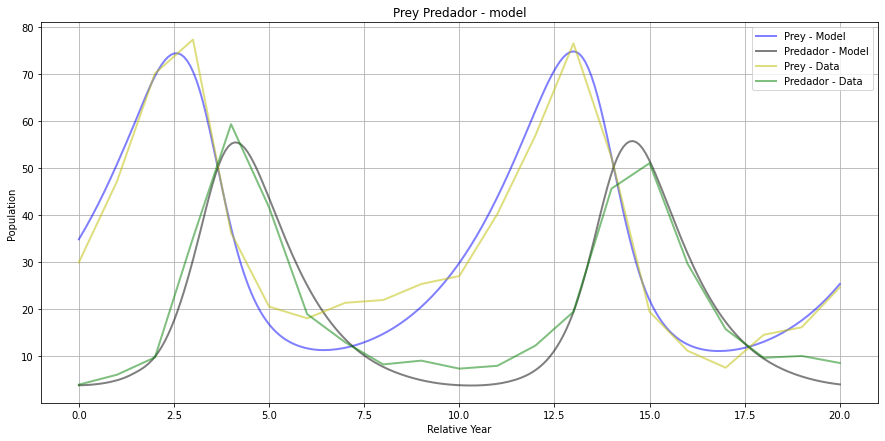

In [17]:
###################################################################################################
# Simulation


#x0 = [35.3,3.8]
x0 = [34.9134,3.8566]  # Tuned parameters 
#x0 = [33.63735307, 19.36548223]  # Dados
# x0 = [33, 19]  # Dados

T  = np.linspace(0,20,240)  # vetor de tempo

# Cálculo no tempo 

t, y = control.input_output_response(io_preypredador, T, 0, x0)

plt.figure(figsize=(15,7))
plt.plot(t,y[0],'b', alpha=0.5, lw=2, label='Prey - Model') 
plt.plot(t,y[1],'k', alpha=0.5, lw=2, label='Predador - Model')
plt.plot(year,hare,'y', alpha=0.5, lw=2, label='Prey - Data')
plt.plot(year,lynx,'g', alpha=0.5, lw=2, label='Predador - Data')
plt.grid()
plt.legend()
plt.title('Prey Predador - model')
plt.xlabel('Relative Year')
plt.ylabel('Population')

plt.show()

# **Control Project**

## **Formulation of the problem**

The vector of state dynamics functions represented by eq. 
(1) is given in more details as:
\begin{equation}
\left\{ {\begin{array}{l}
 \dot {x}_1 (t)=f_1 \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right); \\ 
 \dot {x}_2 (t)=f_2 \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right); \\ 
 \vdots \\ 
 \dot {x}_n (t)=f_n \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right). \\ 
 \end{array}} \right.
\end{equation}

The output vector represented by eq. (2) is given in more details as:
\begin{equation}
\left\{ {\begin{array}{l}
 y_1 (t)=g_1 \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right); \\ 
 y_2 (t)=g_2 \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right); \\ 
 \vdots \\ 
 y_p (t)=g_p \left( {{\rm {\bf x}}(t),{\rm {\bf u}}(t)} \right). \\ 
 \end{array}} \right.
\end{equation}

Given the nominal operating conditions, expansion of the vector of functions $\textbf{f}(\textbf{x},\textbf{u})$ around $\textbf{x}_{0}(t)$ and $\textbf{u}_{0}(t)$

$\quad \Rightarrow $ Each equation of the dynamic system: $\dot {x}_i (t)=f_i ({\rm {\bf x}}(t),{\rm {\bf u}}(t))$, for $i = 1 \dots n$, now becomes:


\begin{equation}
\begin{array}{l}
 \frac{d}{dt}\left( {x_{0,i} (t)+\delta x_i (t)} \right)=f_i \left( {{\rm 
{\bf x}}_{\rm {\bf 0}} (t)+\delta {\rm {\bf x}}(t),{\rm {\bf u}}_{\rm {\bf 
0}} (t)+\delta {\rm {\bf u}}(t)} \right)= \\ 
 \mbox{ }f_i \left( {{\rm {\bf x}}_{\rm {\bf 0}} (t),{\rm {\bf u}}_{\rm {\bf 
0}} (t)} \right)+\left( {\frac{\partial f_i }{\partial {\rm {\bf x}}}} 
\right)_{\rm {\bf 0}} \delta {\rm {\bf x}}(t)+\left( {\frac{\partial f_i 
}{\partial {\rm {\bf u}}}} \right)_{\rm {\bf 0}} \delta {\rm {\bf 
u}}(t)+T.O.S. \\ 
 \end{array}
\end{equation}

For all $n$ equations in the system, you have:
\begin{equation}
\frac{d}{dt}\delta {\rm {\bf x}}(t)=\left[ {\begin{array}{l}
 \left( {\frac{\partial f_1 }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \left( {\frac{\partial f_2 }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \vdots \\ 
 \left( {\frac{\partial f_n }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \end{array}} \right]\delta {\rm {\bf x}}(t)+\left[ {\begin{array}{l}
 \left( {\frac{\partial f_1 }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \left( {\frac{\partial f_2 }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \vdots \\ 
 \left( {\frac{\partial f_n }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \end{array}} \right]\delta {\rm {\bf u}}(t),
\end{equation}
or the more reduced form,
\begin{equation}
\frac{d}{dt}\delta {\rm {\bf x}}(t)={\rm {\bf A}}(t)\delta {\rm {\bf 
x}}(t)+{\rm {\bf B}}(t)\delta {\rm {\bf u}}(t).
\end{equation}

\begin{equation}
{\rm {\bf A}}(t)=\left[ {{\begin{array}{*{20}c}
 {\left( {\frac{\partial f_1 }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_1 }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_1 }{\partial x_n }} \right)_0 } \hfill \\
 {\left( {\frac{\partial f_2 }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_2 }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_2 }{\partial x_n }} \right)_0 } \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 {\left( {\frac{\partial f_n }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_n }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_n }{\partial x_n }} \right)_0 } \hfill \\
\end{array} }} \right]_{(nxn)} 
\end{equation}
\begin{equation}
{\rm {\bf B}}(t)=\left[ {{\begin{array}{*{20}c}
 {\left( {\frac{\partial f_1 }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_1 }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_1 }{\partial u_m }} \right)_0 } \hfill \\
 {\left( {\frac{\partial f_2 }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_2 }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_2 }{\partial u_m }} \right)_0 } \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 {\left( {\frac{\partial f_n }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial f_n }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial f_n }{\partial u_m }} \right)_0 } \hfill \\
\end{array} }} \right]_{(nxm)} 
\end{equation}

For all $p$ equations in the output system, you have:
\begin{equation}
\delta {\rm {\bf y}}(t)=\left[ {\begin{array}{l}
 \left( {\frac{\partial g_1 }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \left( {\frac{\partial g_2 }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \vdots \\ 
 \left( {\frac{\partial g_p }{\partial {\rm {\bf x}}}} \right)_0 \\ 
 \end{array}} \right]\delta {\rm {\bf x}}(t)+\left[ {\begin{array}{l}
 \left( {\frac{\partial g_1 }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \left( {\frac{\partial g_2 }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \vdots \\ 
 \left( {\frac{\partial g_p }{\partial {\rm {\bf u}}}} \right)_0 \\ 
 \end{array}} \right]\delta {\rm {\bf u}}(t),
\end{equation}
or the reduced form,
\begin{equation}
\delta {\rm {\bf y}}(t)={\rm {\bf C}}(t)\delta {\rm {\bf x}}(t)+{\rm {\bf 
D}}(t)\delta {\rm {\bf u}}(t).
\end{equation}

where $\textbf{C}(t)$ and $\textbf{D}(t)$ are the given matrices for:
\begin{equation}
{\rm {\bf C}}(t)=\left[ {{\begin{array}{*{20}c}
 {\left( {\frac{\partial g_1 }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_1 }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_1 }{\partial x_n }} \right)_0 } \hfill \\
 {\left( {\frac{\partial g_2 }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_2 }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_2 }{\partial x_n }} \right)_0 } \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 {\left( {\frac{\partial g_p }{\partial x_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_p }{\partial x_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_p }{\partial x_n }} \right)_0 } \hfill \\
\end{array} }} \right]_{(pxn)} 
\end{equation}
\begin{equation}
{\rm {\bf D}}(t)=\left[ {{\begin{array}{*{20}c}
 {\left( {\frac{\partial g_1 }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_1 }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_1 }{\partial u_m }} \right)_0 } \hfill \\
 {\left( {\frac{\partial g_2 }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_2 }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_2 }{\partial u_m }} \right)_0 } \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 {\left( {\frac{\partial g_p }{\partial u_1 }} \right)_0 } \hfill & {\left( 
{\frac{\partial g_p }{\partial u_2 }} \right)_0 } \hfill & \cdots \hfill & 
{\left( {\frac{\partial g_p }{\partial u_m }} \right)_0 } \hfill \\
\end{array} }} \right]_{(pxm)} 
\end{equation}

If the nominal operating condition is a steady-state operating condition, in other words ${\rm {\bf \dot {x}}}_{\rm {\bf 0}} (t)={\rm {\bf 0}}$, then the system matrices $\textbf{A}, \textbf{B}, \textbf{C}$ and $\textbf{D}$, are constant and the system is of type Linear Invariant in Time (LIT). Thus, eq. (27) stay the same:

\begin{equation}
\frac{d}{dt}\partial {\rm {\bf x}}(t)={\rm {\bf A}}\partial {\rm {\bf 
x}}(t)+{\rm {\bf B}}\partial {\rm {\bf u}}(t)
\end{equation}

\begin{equation}
\delta {\rm {\bf y}}(t)={\rm {\bf C}}\delta {\rm {\bf x}}(t)+{\rm {\bf 
D}}\delta {\rm {\bf u}}(t)
\end{equation}

In [18]:
###################################################################################################
# Balance point

xe = balance[0]
He = xe[0]
Le = xe[1]

state_space = control.linearize(io_preypredador,[He,Le],0)

### Getting the matrices

A, B, C, D = state_space.A, state_space.B, state_space.C, state_space.D

/usr/local/lib/python3.7/dist-packages/control/iosys.py:931: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



We are considering whether it would be reasonable to assemble a list of situations where nonlinearities play a crucial role. If possible with applications in economics: hysteresis, interest rate > 0, multiple equilibria... The point is that "non-linear" is not a coherent theory, but an endless array of situations that somehow violate the assumption of linearity 


## **Modelization of a State Space**

Representation of the dynamics of a $n$ order system using n first order differential equations. \\
A vector of dimension $n$ x1 ⇒ called a state vector \\
A vector of dimension $m$ x1 ⇒ called an input vector \\
We need to convert a $n$ order differential system into $n$ differential equations of first order.

## **General form of a state space**

${\rm {\bf \dot {x}}}(t)={\rm {\bf A}}(t){\rm {\bf x}}(t)+{\rm {\bf 
B}}(t){\rm {\bf u}}(t) \quad \to $ state equations

${\rm {\bf y}}(t)={\rm {\bf C}}(t){\rm {\bf x}}(t)+{\rm {\bf D}}(t){\rm {\bf 
u}}(t) \quad \to $ output equations

where

${\rm {\bf x}}(t)\quad -$ state vector $R^{n}$ (dimension $n$x1);

${\rm {\bf u}}(t)\quad -$ input vector $R^{m }$(dimension $m$x1);

${\rm {\bf y}}(t)\quad -$ output vector $R^{p }$(dimension $p$x1);

${\rm {\bf A}}(t)\quad -$ state transmission matrix ($n$x$n)$;

${\rm {\bf B}}(t)\quad -$ input matrix ($n$x$m)$;

${\rm {\bf C}}(t)\quad -$ output matrix or sensor matrix 
($p$x$n)$;

${\rm {\bf D}}(t)\quad -$ direct feed matrix ($p$x$m)$.

Outputs are variables associated with sensors $\Rightarrow $ they are measured variables.

Inputs are variables that change the energy of the system.

The dynamics of a system can be $\textbf{time-varying}$ or $\textbf{time-invariant}$: \\
* Linear $\textbf{time-invariant}$ system $\Rightarrow $ matrices $\textbf{A}, \textbf{B}, \textbf{C}$ and $\textbf{D}$ are constant;

* Linear $\textbf{time-varying}$ system $\Rightarrow $ matrices $\textbf{A}(t), \textbf{B}(t), \textbf{C}(t)$ and $\textbf{D}(t)$ vary in time.

Systems can be: \

$\textbf{SISO} \Rightarrow \textit{Single}$ (uma) Input, $\textit{Single}$(uma) Output;

$\textbf{MIMO}$ $\Rightarrow $ Multiple Inputs, Multiple Outputs.
Usually with Linear Time-Invariant Systems (LTI) $\Rightarrow $ relation between the output (y) and the input (u) are not directly time dependant.

\begin{equation}
{{\begin{array}{*{20}c}
 {{\rm {\bf \dot {x}}}(t)={\rm {\bf Ax}}(t)+{\rm {\bf Bu}}(t)} \hfill \\
 {{\rm {\bf y}}(t)={\rm {\bf Cx}}(t)+{\rm {\bf Du}}(t)} \hfill \\
\end{array} }} 
\end{equation}

In this case, the matrices $\textbf{A}, \textbf{B}, \textbf{C}$ and $\textbf{D}$ are constants.

The future outputs depend only on the present state and the future inputs.

There is not only one set of states for the same system $\Rightarrow $ there is many possibilities for the state vector of a system.


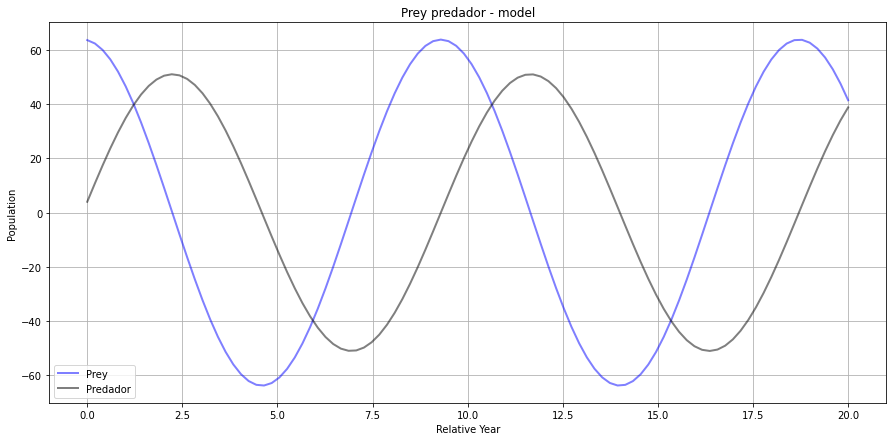

In [19]:
###################################################################################################
# Linear Model Simulation

System =  control.ss(A,B,C,D)
T, yout = impulse_response(System, 20, X0= [hare[0],lynx[0]],)


plt.figure(figsize=(15,7))
plt.plot(T,yout[0][0],'b', alpha=0.5, lw=2, label='Prey') 
plt.plot(T,yout[1][0],'k', alpha=0.5, lw=2, label='Predador')
plt.grid()
plt.legend()
plt.title('Prey predador - model')
plt.xlabel('Relative Year')
plt.ylabel('Population')

plt.show()


# **Diagonal Form**


The state vector is not unique for a dynamic system $\Rightarrow$ there are many possibilities to define a state vector for the same dynamic system.

Each state vector will generate a different form of SS (State Space) for a same FT (Function Transfer).

There are some classic forms of state space representation.

## **Canonic Form**

Each form is useful for a particular purpose.

1.   Controllable;
2.   Observable;
3.   Jordan;
4.   Diagonal or Modal.

Most important way to analyze the dynamic systems $\Rightarrow $ diagonal or modal $\Rightarrow $ allows you to  easily visualize the system dynamics.

Matrix expressions in time can be written in the diagonal SS form, ie:

\begin{equation}
\begin{array}{l}
 \left[ {\begin{array}{l}
 \dot {x}_1 (t) \\ 
 \dot {x}_2 (t) \\ 
 \vdots \\ 
 \dot {x}_n (t) \\ 
 \end{array}} \right]=\left[ {{\begin{array}{*{20}c}
 {p_1 } \hfill & 0 \hfill & \cdots \hfill & 0 \hfill \\
 0 \hfill & {p_2 } \hfill & \cdots \hfill & 0 \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 0 \hfill & 0 \hfill & \cdots \hfill & {p_n } \hfill \\
\end{array} }} \right]\left[ {\begin{array}{l}
 x_1 (t) \\ 
 x_2 (t) \\ 
 \vdots \\ 
 x_n (t) \\ 
 \end{array}} \right]+\left[ {\begin{array}{l}
 r_1 \\ 
 r_2 \\ 
 \vdots \\ 
 r_n \\ 
 \end{array}} \right]u(t) \\ 
 y(t)=\left[ {{\begin{array}{*{20}c}
 1 \hfill & 1 \hfill & \cdots \hfill & 1 \hfill \\
\end{array} }} \right]\left[ {\begin{array}{l}
 x_1 (t) \\ 
 x_2 (t) \\ 
 \vdots \\ 
 x_n (t) \\ 
 \end{array}} \right] \\ 
 \end{array}
\end{equation}

Note that the A matrix is diagonal and its diagonal is the poles of the system.


In [20]:
###################################################################################################
# Analyze of the Poles and Zeros of the system

control.pole(System)
control.zero(System)
control.damp(System)

_____Eigenvalue______ Damping___ Frequency_
         0   +0.6676j         -0     0.6676
         0   -0.6676j         -0     0.6676


(array([0.6675973, 0.6675973]),
 array([-0., -0.]),
 array([0.+0.6675973j, 0.-0.6675973j]))

# **Linear Transformation**

Given a LIT system in the form of state space:
 
 \begin{equation}
\left\{ {\begin{array}{l}
 {\rm {\bf \dot {x}}}(t)={\rm {\bf Ax}}(t)+{\rm {\bf Bu}}(t) \\ 
 {\rm {\bf y}}(t)={\rm {\bf Cx}}(t)+{\rm {\bf Du}}(t) \\ 
 \end{array}} \right.
\end{equation}

**What is the corresponding Transfer Function ?**


Aplicando a Transformada de Laplace na equação da dinâmica dos 
estados,
Applying the Laplace Transform to the equation of the dynamics of State,
\begin{equation}
L\left\{ {{\rm {\bf \dot {x}}}(t)} \right\}=L\left\{ {{\rm {\bf Ax}}(t)+{\rm 
{\bf Bu}}(t)} \right\}
\end{equation}
Assuming the Heavyside initial conditions (by definition the TF has initial condition equal to zero), we have:
\begin{equation}
s{\rm {\bf X}}(s)={\rm {\bf AX}}(s)+{\rm {\bf BU}}(s)
\end{equation}

Rearranging,
\begin{equation}
\left( {s{\rm {\bf I}}-{\rm {\bf A}}} \right){\rm {\bf X}}(s)={\rm {\bf 
BU}}(s)
\end{equation}
Isolating $\textbf{X}(s)$
\begin{equation}
{\rm {\bf X}}(s)=\left( {s{\rm {\bf I}}-{\rm {\bf A}}} \right)^{-1}{\rm {\bf 
BU}}(s)
\end{equation}

Applying the Laplace Transform to the equation of system outputs,
\begin{equation}
L\left\{ {{\rm {\bf y}}(t)} \right\}=L\left\{ {{\rm {\bf Cx}}(t)+{\rm {\bf 
Du}}(t)} \right\}
\end{equation}
or
\begin{equation}
{\rm {\bf Y}}(s)={\rm {\bf CX}}(S)+{\rm {\bf DU}}(s)
\end{equation}


Substituting the equations, we have:
\begin{equation}
{\rm {\bf Y}}(s)={\rm {\bf C}}\left( {s{\rm {\bf I}}-{\rm {\bf A}}} 
\right)^{-1}{\rm {\bf BU}}(s)+{\rm {\bf DU}}(s)
\end{equation}
\begin{equation}
{\rm {\bf Y}}(s)=\left[ {{\rm {\bf C}}\left( {s{\rm {\bf I}}-{\rm {\bf A}}} 
\right)^{-1}{\rm {\bf B}}+{\rm {\bf D}}} \right]{\rm {\bf U}}(s)
\end{equation}


Remember that the TF is the relation between the system's output and input, that is, $\textbf{Y}($s$)/\textbf{U}($s$)$,
\begin{equation}
{\rm {\bf G}}(s)={\rm {\bf C}}\left( {s{\rm {\bf I}}-{\rm {\bf A}}} 
\right)^{-1}{\rm {\bf B}}+{\rm {\bf D}}
\end{equation}

$\textbf{G}(s)$ is a matrix of Transfer Functions with dimensions $p \;x \; m$ ($p$ = number of outputs and $m$ = number of inputs);

Each element $G_{ij}(s)$ of the matrix $\textbf{G}(s)$ describes the dynamic of the output $i$ as a function of the input $j$ of the system $\Rightarrow $ for example, $G_{12}(s)$ describes the dynamic relationship between output 1 and input 2 of the system;

If the system only has one input and one output $\Rightarrow G(s)$ is a scalar.


There is a simple method to calculate the TF for systems of any order that does not require matrix inverse calculation, only matrices determinants:

\begin{equation}
G_{ij} (s)=\frac{\det \left[ {{\begin{array}{*{20}c}
 {s{\rm {\bf I}}-{\rm {\bf A}}} \hfill & {-{\rm {\bf B}}_{\rm {\bf j}} } 
\hfill \\
 {{\rm {\bf C}}_{\rm {\bf i}} } \hfill & {{\rm {\bf D}}_{{\rm {\bf ij}}} } 
\hfill \\
\end{array} }} \right]}{\det \left[ {s{\rm {\bf I}}-{\rm {\bf A}}} \right]}
\end{equation}
where $\textbf{C}_{i}$is the $i$-th row of the matrix $\textbf{C}$ and 
$\textbf{B}_{j}$ is the $j$-th column of the matrix $\textbf{B}$ and $\textbf{ 
D}_{ij}$ is the $i,j$ element of the matrix $\textbf{D}$. 

Note that, if the system is SISO $\Rightarrow  \textbf{C} $ is a row matrix and $\textbf{B}$ is a column matrix.

$\textbf{The denominators of all elements of the TF matrix, G(s)}$, are equal $\Rightarrow $ characteristic equation of the system.

The algebric calculation of a matrix inverse is not always a simple process to perform. The only case where we calculate the matrix is

\begin{equation}
{\rm {\bf A}}=\left[ {{\begin{array}{*{20}c}
 {a_{11} } \hfill & {a_{12} } \hfill \\
 {a_{21} } \hfill & {a_{22} } \hfill \\
\end{array} }} \right]
\end{equation}

\begin{equation}
\left( {s{\rm {\bf I}}-{\rm {\bf A}}} \right)^{-1}=\left[ 
{{\begin{array}{*{20}c}
 {s-a_{11} } \hfill & {-a_{12} } \hfill \\
 {-a_{21} } \hfill & {s-a_{22} } \hfill \\
\end{array} }} \right]^{-1}=\frac{1}{det} \left[ {{\begin{array}{*{20}c}
 {s-a_{22} } \hfill & {a_{12} } \hfill \\
 {a_{21} } \hfill & {s-a_{11} } \hfill \\
\end{array} }} \right]
\end{equation}

**For systems of order greater than two, we can use the Cramer's method $\Rightarrow $ very laborious.**

The determinant of a matrix of dimension $n$x$n$ is calculated by summing the cofactors of the matrix:

\begin{equation}
\det \left[ {{\begin{array}{*{20}c}
 {a_{11} } \hfill & {a_{12} } \hfill & \cdots \hfill & {a_{1n} } \hfill \\
 {a_{21} } \hfill & {a_{22} } \hfill & \cdots \hfill & {a_{2n} } \hfill \\
 \vdots \hfill & \vdots \hfill & \ddots \hfill & \vdots \hfill \\
 {a_{n1} } \hfill & {a_{n2} } \hfill & \cdots \hfill & {a_{nn} } \hfill \\
\end{array} }} \right]_{(nxn)} =a_{11} A_{11} +a_{12} A_{12} +\cdots +a_{1n} 
A_{1n} 
\end{equation}

where $A_{ij}$ is the cofactor of the element $a_{ij}$, given by:

\begin{equation}
A_{ij} =(-1)^{i+j}\det {\rm {\bf D}}_{{\rm {\bf ij}}} 
\end{equation}

# **Observability and Controllability**

A LIT system is contrallable if there is an input vector $\textbf{u}(t)$ for 0 $\le t \le T$, with $T  >$ 0 and finite, such that the system goes from initial condition $\textbf{x}(0)$ to any state 
$\textbf{x}$ in the time interval $T$.

Starting at $t$ = 0 is not a special case. If it can go to any state in finite time, starting at $ t$ = 0, then it can from any initial condition reach any state in finite time.

For controllability, just consider the forced solution of the system, ie:

\begin{equation}
{\rm {\bf x}}(t)=\int\limits_0^t {e^{{\rm {\bf A}}(t-\tau )}{\rm {\bf 
Bu}}(\tau )d\tau } .
\end{equation}


The controllability is associated to the ability to influence all states through the system's inputs.


Considering a $n$ order system, we have:
\begin{equation}
{\rm {\bf \dot {x}}}(t)={\rm {\bf Ax}}(t)+{\rm {\bf Bu}}(t),
\end{equation}
where $\textbf{x}(t)  \in  R^{n}$ and $\textbf{u}(t) \in   R^{m}$. 

Observe that for a system to be controllable, it is enough to analyze the equation of the states, that is, the pair of matrices $\textbf{A}$ and $\textbf{B}$.

Definition of a controllable matrix $\textbf{M}_{C}$:
\begin{equation}
{\rm {\bf M}}_{\rm {\bf C}} =\left[ {{\begin{array}{*{20}c}
 {\rm {\bf B}} \hfill & {{\rm {\bf AB}}} \hfill & {{\rm {\bf A}}^2{\rm {\bf 
B}}} \hfill & \cdots \hfill & {{\rm {\bf A}}^{n-1}{\rm {\bf B}}} \hfill \\
\end{array} }} \right].
\end{equation}

The system defined by the matrices ($\textbf{A}, \textbf{B}$) is controllable if rank($\textbf{M}_{C})=n$. $\textit{Rank}$ is equal to the rank of a matrix, represented by the number of rows and columns linearly independant in the matrix.


## **Observability**

A LIT system is observable if any initial condition $\textbf{x}(0)$ can be obtained by knowing the inputs $\textbf{u}(t)$ and the outputs $\textbf{y}(t)$ of the system for every instant of time $t$ between 0 and $T>0$.

If the initial condition of states $\textbf{x}(0)$ can be calculated, then the states vector $\textbf{x}(t)$ can be reconstructed at any instant of time. Note that if you know the initial condition $\textbf{x}(0)$ and the input vector $\textbf{u}(t)$ at any instant, then you can calculate $\textbf{x}(t)$ at any instant of time $t$.

To study the observability, it is enough to consider the case $\bf{u}(t)=0$, that is, the homogeneous solution, given by:

\begin{equation}
{\rm {\bf y}}(t)={\rm {\bf C}}e^{{\rm {\bf A}}t}{\rm {\bf x}}(0).
\end{equation}

**The observability is associated with the ability to "see" all states though system's outputs.**


Considering a $n$ order system, with an input vector $\textbf{u}(t)$=0, then you have:

\begin{equation}
\left\{ {\begin{array}{l}
 {\rm {\bf \dot {x}}}(t)={\rm {\bf Ax}}(t); \\ 
 {\rm {\bf y}}(t)={\rm {\bf Cx}}(t); \\ 
 \end{array}} \right.,
\end{equation}

where $\textbf{x}(t) \in R^{n}$ and $\textbf{y}(t) \in  R^{p}$. \\
Note that for a system to be observable it is enough to analyze the pair of matrices $\textbf{A}$ and $\textbf{C}$.

Definition of an observability matrix $\textbf{M}_{O}$:

\begin{equation}
{\rm {\bf M}}_{\rm {\bf O}} =\left[ {\begin{array}{l}
 {\rm {\bf C}} \\ 
 {\rm {\bf CA}} \\ 
 {\rm {\bf CA}}^2 \\ 
 \vdots \\ 
 {\rm {\bf CA}}^{n-1} \\ 
 \end{array}} \right].
\end{equation}

The system defined by the matrices ($\textbf{A}, \textbf{C}$) is observable if $ rank(\textbf{M}_{O})=n$.

In [21]:
Observability = control.obsv(A, C)
npl.matrix_rank(Observability)

2

In [22]:
 ###################################################################################################
# Controlability

 Controlability = control.ctrb(A, B)
 npl.matrix_rank(Controlability)

2

In [23]:
###################################################################################################
# Analyze of the system poles and zeros 

control.pole(System)
control.zero(System)
control.damp(System)

_____Eigenvalue______ Damping___ Frequency_
         0   +0.6676j         -0     0.6676
         0   -0.6676j         -0     0.6676


(array([0.6675973, 0.6675973]),
 array([-0., -0.]),
 array([0.+0.6675973j, 0.-0.6675973j]))

In [24]:
state_space.A,  state_space.B

(array([[ 0.        , -0.83494638],
        [ 0.53379015,  0.        ]]), array([[33.63735307],
        [ 0.        ]]))

In [25]:
###################################################################################################
# Control Project

### Amf = A - BK _ A is known and B is known - model
### Amf is also know --> gain K

A, B = state_space.A, state_space.B

### Control Project

K = control.place(state_space.A, state_space.B, [-0.5, -0.25]) ### --> LQR - quadratic linear regulator

### Control Project

C = np.array([[0, 1]])                # Regulated output --> C = [[1, 0][0 1]] two outputs
kf = -1/(C @ np.linalg.inv(A - B @ K) @ B)

In [26]:
K ### multiplication - gain 0.08918657*preys + 0.0865658* predators - control law

array([[ 0.02229664, -0.01786026]])

In [27]:
kf ### "normalize" the output/input ratio

array([[0.00696174]])

In [34]:
K = K1a

In [35]:
###################################################################################################
# Creating a controller - control.y[0] - block of control

io_controller = control.NonlinearIOSystem(
  None,
  lambda t, x, u, params: -K @ (u[1:] - xe) + kf * (u[0] - xe[1]),
  inputs=('Ld', 'u1', 'u2'), outputs=1, name='control')

In [36]:
###################################################################################################
# Closing the control loop

# Connecting the code blocks

io_closedloop = control.InterconnectedSystem(
  (io_preypredador, io_controller),       # systems
  connections=(
    ('preypreda.u', 'control.y[0]'),
    ('control.u1',  'preypreda.H'),
    ('control.u2',  'preypreda.L')
  ),
  inplist=('control.Ld'),
  outlist=('preypreda.H', 'preypreda.L', 'control.y[0]')
)

/usr/local/lib/python3.7/dist-packages/control/iosys.py:931: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



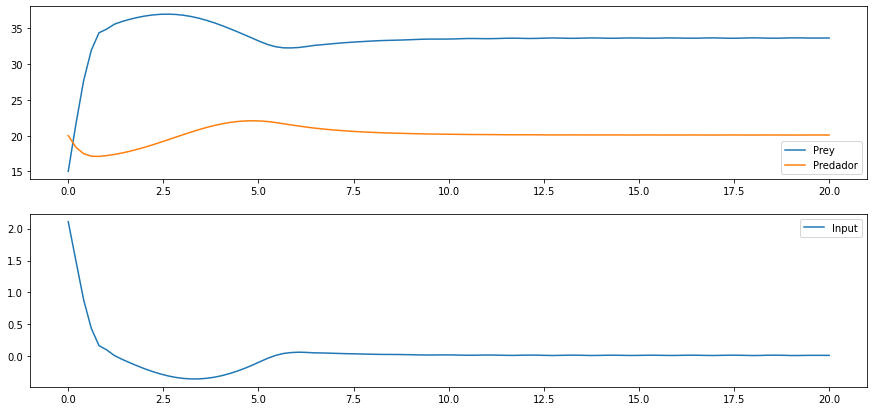

In [37]:
###################################################################################################
# Simulation of the system

t, y = control.input_output_response(io_closedloop, T, 30, [15, 20])

# Visualization of the results

plt.figure(figsize=(15,7))
plt.subplot(2, 1, 1)
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.legend(['Prey', 'Predador'])
plt.subplot(2, 1, 2)
plt.plot(t, y[2])
plt.legend(['Input'])
plt.show(block=False)

\begin{equation}
\left[
  u_1 \quad  u_2 \right]*
\left[
  \begin{array}{l}
  u_1 \\
  u_2
  \end{array} \right]
  = u_1^2 + u_2^2
\end{equation}

\begin{equation}
J = \int_0^{t_f} x(t)^TQ_{x1}x(t) + u(t)^TQ_{u1a}u(t) dt
\end{equation}

In [32]:
Qx1 = np.diag([0.01, 0.01])
Qu1a = np.diag([1])
K, X, E = control.lqr(A, B, Qx1, Qu1a)
K1a = np.matrix(K)

In [33]:
K1a

matrix([[0.11172425, 0.07821261]])

# **Project with a state observer**

## **Block diagram examples**

In [ ]:
P = control.tf2io(control.tf(1, [1, 0]), inputs='u', outputs='y')
C = control.tf2io(control.tf(10, [1, 1]), inputs='e', outputs='u')
sumblk = control.summing_junction(inputs=['r', '-y'], output='e')
T = control.interconnect([P, C, sumblk], inplist='r', outlist='y')

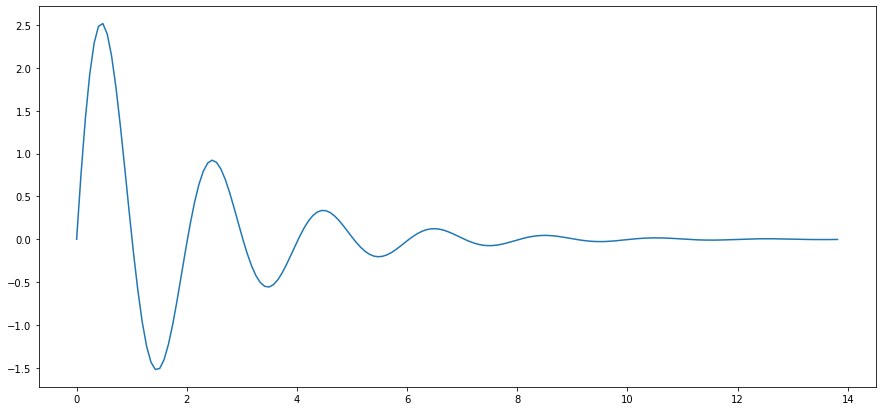

In [ ]:
###################################################################################################
# Testing the model in simulation

###################################################################################################
# Simulation

# Syntax : t, y = input_output_response(io_sys, T, U, X0, params)

t, output = control.impulse_response(T)

plt.figure(figsize=(15,7))
plt.plot(t,output) # Linx
plt.show()

# **Tuning the coefficients**

In [ ]:
###################################################################################################
# Modification of the model - generalization

def prey_predador(t,x,u,parameters):
  """ Creation of the nonlinear model of the phenomenon """

  # Initial parameters
  a = parameters.get('a')
  b = parameters.get('b')
  c = parameters.get('c')
  d = parameters.get('d')
  u_0 = 0

  # Initial values of hares and lynx - x_o = [xo1 xo2].T
  H = x[0];
  L = x[1];

  # System's input - add food - never remove
  u = u_0 if u > 0 else 0 

  # Determine the equations
  dH = (a + u)*H -b*H*L
  dL = -c*L + d*H*L

  return [dH,dL]

In [ ]:
###################################################################################################
# Creating the corresponding sub system

# Syntax: io_sys = NonlinearIOSystem(updfcn, outfcn, inputs=M, outputs=P, states=N)

io_modelo = control.NonlinearIOSystem(
    prey_predador, None, inputs=('u'), outputs=('H', 'L'),
    states=('H', 'L'), params={}, name='PP_model')

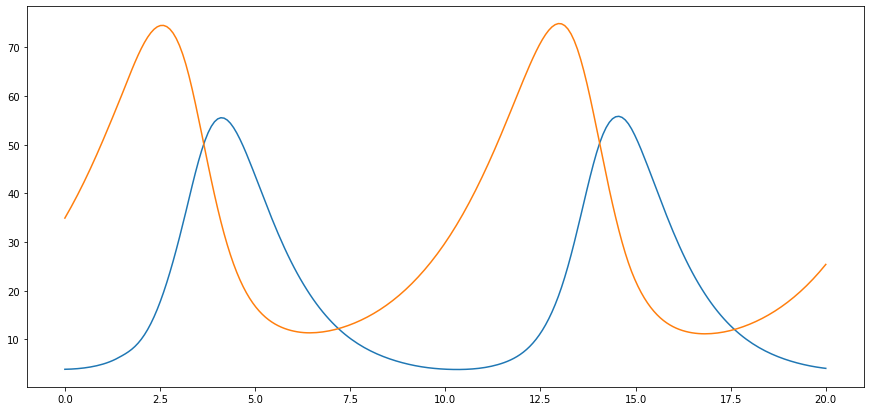

In [ ]:
###################################################################################################
# Testing the model in simulation

###################################################################################################
# Simulation

x0 = [34.9134,3.8566] 

# Calculation in time

parameters = {'a':0.48069,'b':0.024822,'c':0.92718,'d':0.027564}

# Syntax : t, y = input_output_response(io_sys, T, U, X0, params)

t, output = control.input_output_response(io_model, np.linspace(0,20,240), 0, x0,parameters)

plt.figure(figsize=(15,7))
plt.plot(t,output[1]) # Hares
plt.plot(t,output[0]) # Lynx
plt.show()

To estimate model parameters, we will initially use the least squares method. Then we can formulate the problem from the equation below. In the equation, $y_m(k)$ represents the real data in each sample $k$; $y_s(\theta,k)$ represents the **estimated value** from the model simulation for a given sample $k$ and $\theta$ represents the parameters vector $\theta = [ \alpha \; \; \beta \; \; \gamma \; \; \delta \; \; x(0) \; \; x(1) ]^T$.

$$ min_{\theta}= \sum_{k=1}^{K}(y_m(k) - y_s(\theta,k))^2 $$

The equation asks the question: Which values of  $\alpha \; \; \beta \; \; \gamma \; \; \delta \; \; x(0) \; \; x(1) $ minimize the squared error when compared to the real data.

In [ ]:
Hn = np.array(hare)
Ln = np.array(lynx)
tn = np.linspace(0,240,21)

In [ ]:

###################################################################################################
# Determine the merit function

def ErroQuadratico(Hn,Ln,tn,x0,u,parameters):
    """ function to pass to scipy.optimize.fmin
        The routine will square and sum the values returned by 
        this function""" 
    t, y = control.input_output_response(io_modelo, tn, u, x0,parameters)
    erroH = y[0] - Hn
    erroL = y[1] - Ln
    EQ = np.sum((np.concatenate([erroH,erroL])**2))
    return EQ

def objetivo(p):
  parameters = {'a':p[0],'b':p[1],'c':p[2],'d':p[3]}
  xi = [p[4],p[5]]
  return ErroQuadratico(np.array(Hn),np.array(Ln),np.array(tn),xi,0,parameters)

In [ ]:
import scipy.optimize

xopt = scipy.optimize.fmin(func=objetivo, x0=[0.453,0.0205,0.79,0.0229,34.9134,3.8566])

In [ ]:
xopt

array([4.34102011e-01, 2.04230432e-02, 7.97479834e-01, 2.31833160e-02,
       3.53549269e+01, 3.87112585e+00])

#**References**

https://python-control.readthedocs.io/_/downloads/en/0.9.0/pdf/

https://stackoverflow.com/questions/19070943/numpy-scipy-analog-of-matlabs-fminsearch

https://jmahaffy.sdsu.edu/courses/f17/math636/beamer/lotvol-04.pdf

https://python-control.readthedocs.io/en/0.8.3/iosys.html